In [2]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scanpy as scp
from matplotlib.axis import Axis 
import functions as f

In [3]:
data = scp.read_h5ad('data_8_25_23.h5ad') #preprocessed data

## This is the standard workflow for our FP diffusion maps

In [ ]:
scp.pp.pca(data, n_comps=30) 
X=data.obsm['X_pca']
I=pynn.NNDescent(X, n_neighbors=30)
ind,dist=I.query(X,k=15)

In [ ]:
nn = f.nn_graph_directed(ind, dist)
nn = nn + nn.T
T = f.getTransitionMatrix(nn)
dMap, eVals = f.getDiffMap(T)
specGap = [eVals[i]-eVals[i+1] for i in range(len(eVals)-1)]

In [ ]:
data.obsp['connectivities'] = T
scp.tl.leiden(data, resolution=1)
data.obs.value_counts('leiden')[:50]
data.obsm['X_diffmap'] = dMap
eVals = data.uns['diffmap_evals']

# Diffusion map plots

/var/folders/h6/g3s935_s08s17h1t90h3x8mc0000gp/T/ipykernel_28373/1675434294.py:7: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(dMap[:,d1], dMap[:,d2], dMap[:,d3],cmap='jet', s=2,c=col, alpha =1)


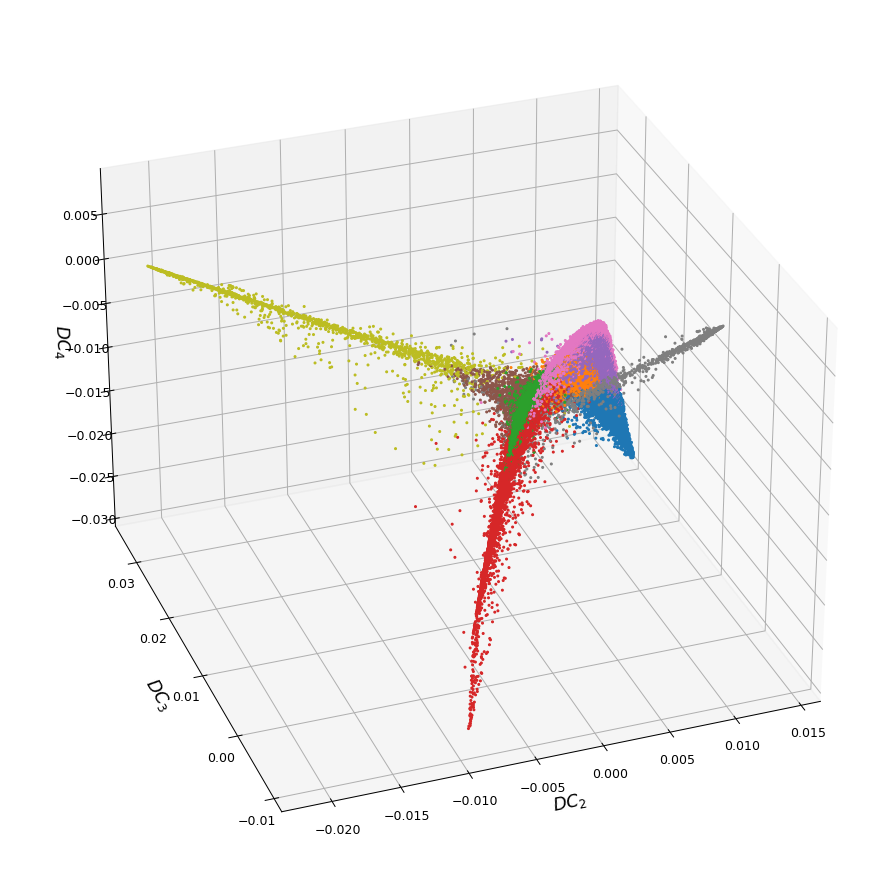

In [183]:
col = [f'C{x}' for x in data.obs['leiden']]
d1=2
d2=d1+1
d3=d2+1
fig = plt.figure(figsize=(12,10), dpi=90)
ax = fig.add_subplot(111, projection='3d')
ax.scatter(dMap[:,d1], dMap[:,d2], dMap[:,d3],cmap='jet', s=2,c=col, alpha =1)
#ax.scatter(np.log10(dMap[:,d1]), np.log10(dMap[:,d2]), np.log10(dMap[:,d3]),cmap='viridis', s=2, alpha =1)

ax.set_xlabel(f'$DC_{d1}$', fontsize = 14)
ax.set_ylabel(f'$DC_{d2}$',fontsize = 14)
ax.set_zlabel(f'$DC_{d3}$',fontsize = 14)

ax.azim = 250
ax.elev = 30
plt.tight_layout()
#plt.savefig('/Users/andrew/Desktop/microgliaFigs/diffmap_view_3.png', dpi=300)
plt.show()

# UMAP plots

In [5]:
arrow_end = []

for i in range(9):
    cells = data.obs.query(f'leiden == {i}').index.tolist()
    df = data[cells,:].obsm['X_umap'].toarray()
    arrow_end.append(tuple(df.mean(axis=0)))
    
min_x = umap[:,0].min()
min_y= umap[:,1].min()

range_y = umap[:,1].max()-umap[:,1].min()
range_x = umap[:,0].max()-umap[:,0].min()

In [6]:
arrow_start = [(.86,.02), (.2,.25),(0, .65), (.53,.99),(.9, .18), (.2, .4), (1,.4), (0, 1), (1, .92)]
arrow_start = [(min_x+x[0]*range_x, min_y+x[1]*range_y) for x in arrow_start]
arrow_pros=dict( arrowstyle = 'fancy')

In [9]:
clust_names = ['cytokine', 'homeostatic', 'transitional', 'metbolically\nstagnant', 'exAM1', 'DAM', 'exAM2','iron-associated' ,'antigen\npresenting']

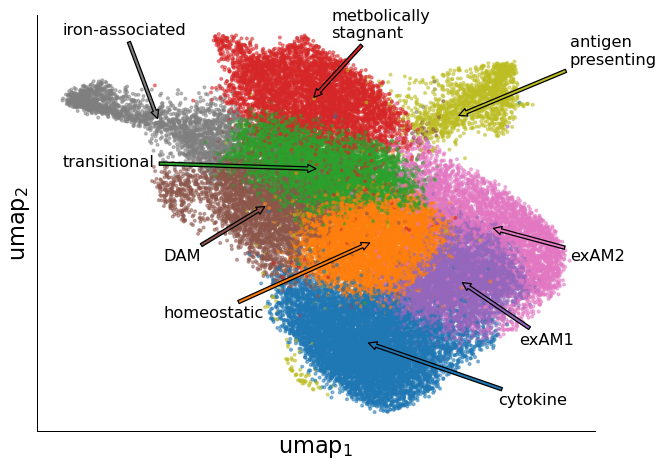

In [10]:
fig = plt.figure(figsize=(8,6), dpi=90)
col = [f'C{i}' for i in data.obs['leiden'].tolist()]
ax = plt.axes()
ax.scatter(umap[:,0], umap[:,1], s=5, alpha = .5, c=col)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
#ax.spines['left'].set_visible(False)
#ax.spines['bottom'].set_visible(False)

plt.xticks([])
plt.yticks([])
plt.xlabel('umap$_1$', fontsize = 18)
plt.ylabel('umap$_2$', fontsize=18)

for i,coords in enumerate(arrow_end):
    plt.annotate(clust_names[i],coords, xytext = arrow_start[i],fontsize=13, arrowprops = dict(arrowstyle = 'simple', color = f'C{i}', ec = 'black') )
plt.savefig('/Users/andrew/Desktop/microgliaFigs/umap_annotated.png', dpi=300)
#plt.tight_layout()
#ax.yaxis.set_label_coords(.17,.3)
#ax.xaxis.set_label_coords(.25,.2)
plt.show()

# Eigenvalues plots

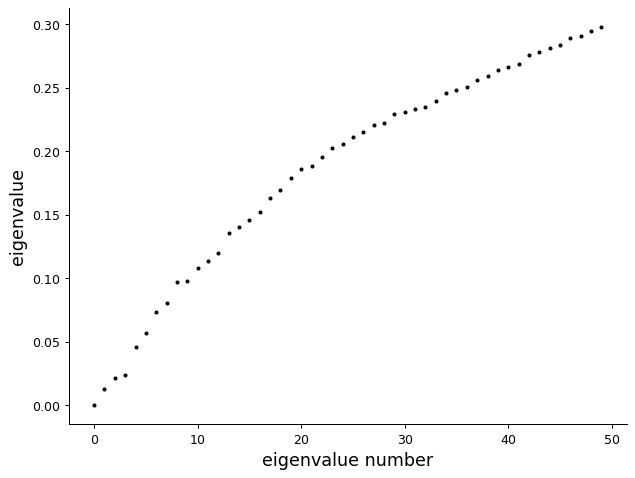

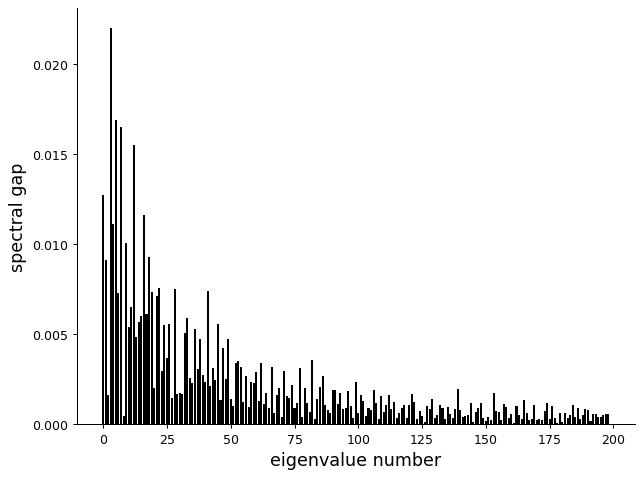

In [19]:
fig = plt.figure(figsize=(8,6), dpi=90)
ax = plt.axes()
ax.scatter([x for x in range(len(eVals[:50]))], 1-eVals[:50], s=5, c='black')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.xlabel('eigenvalue number', fontsize = 14)
plt.ylabel('eigenvalue', fontsize=14)
plt.savefig('/Users/andrew/Desktop/microgliaFigs/evals.png')
plt.show()
fig = plt.figure(figsize=(8,6), dpi=90)
ax = plt.axes()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.xlabel('eigenvalue number', fontsize = 14)
plt.ylabel('spectral gap', fontsize=14)

ax.bar([x for x in range(len(eVals)-1)], height=specGap, color='black')
plt.savefig('/Users/andrew/Desktop/microgliaFigs/specGaps.png')
plt.show()

# Ic plots -- make sure to run get_crit_trans_field.py first

In [5]:
Ic = data.obs['Ic_sm']
pt = data.obs['dpt_pseudotime']

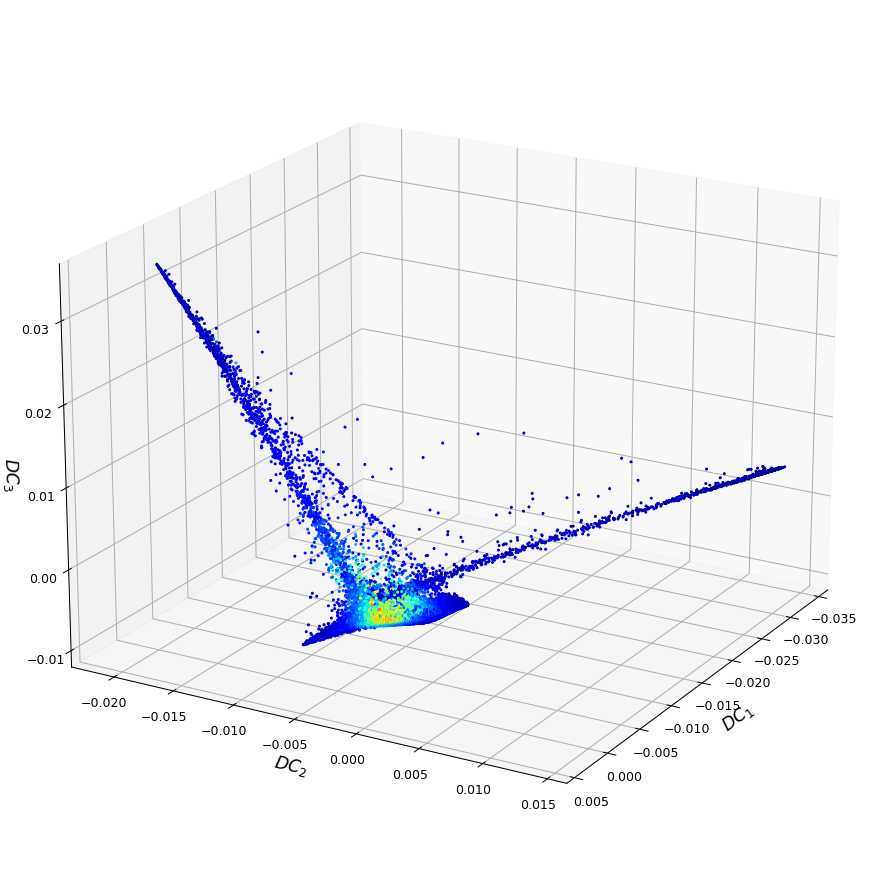

In [36]:
d1=1
d2=d1+1
d3=d2+1
fig = plt.figure(figsize=(12,10), dpi=90)
ax = fig.add_subplot(111, projection='3d')
ax.scatter(dMap[:,d1], dMap[:,d2], dMap[:,d3],cmap='jet', s=2,c=Ic, alpha =1)
#ax.scatter(np.log10(dMap[:,d1]), np.log10(dMap[:,d2]), np.log10(dMap[:,d3]),cmap='viridis', s=2, alpha =1)

ax.set_xlabel(f'$DC_{d1}$', fontsize = 14)
ax.set_ylabel(f'$DC_{d2}$',fontsize = 14)
ax.set_zlabel(f'$DC_{d3}$',fontsize = 14)

ax.azim = 30
ax.elev = 20
plt.tight_layout()
plt.savefig('/Users/andrew/Desktop/microgliaFigs/diffmap_Ic', dpi=300)
plt.show()

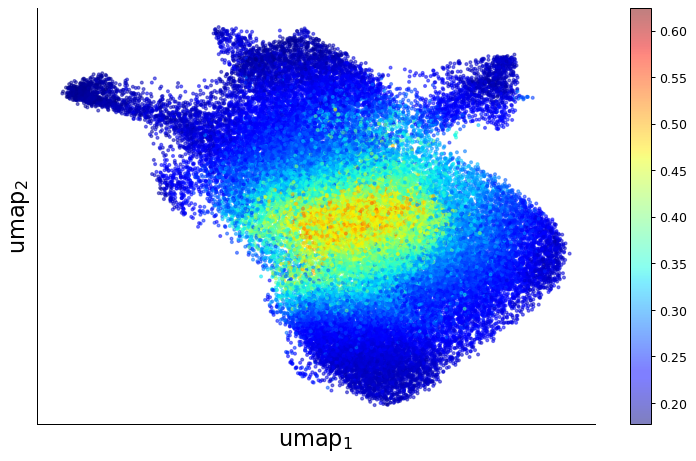

In [73]:
fig = plt.figure(figsize=(10,6), dpi=90)
#col = [f'C{i}' for i in data.obs['leiden'].tolist()]
ax = plt.axes()
ax.scatter(umap[:,0], umap[:,1], s=5, alpha = .5, c=Ic, cmap = 'jet')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
#ax.spines['left'].set_visible(False)
#ax.spines['bottom'].set_visible(False)
mappable = ax.get_children()[0]
plt.colorbar(mappable)

plt.xticks([])
plt.yticks([])
plt.xlabel('umap$_1$', fontsize = 18)
plt.ylabel('umap$_2$', fontsize=18)


plt.savefig('/Users/andrew/Desktop/microgliaFigs/umap_Ic.png', dpi=300)

In [69]:
ax.get_children()

 Text(0.5, 1.0, ''),
 Text(0.0, 1.0, ''),
 Text(1.0, 1.0, ''),

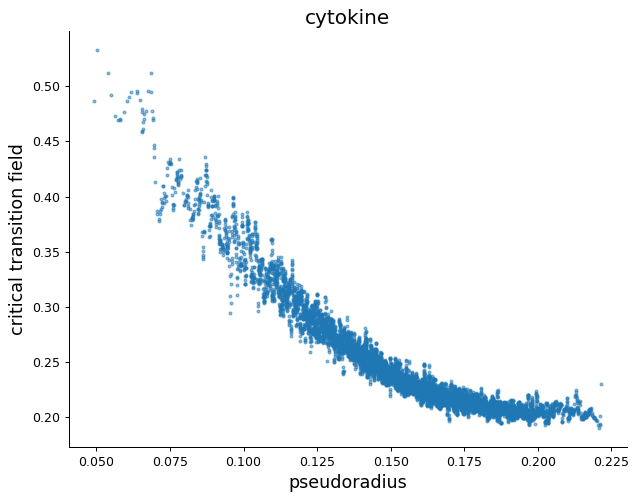

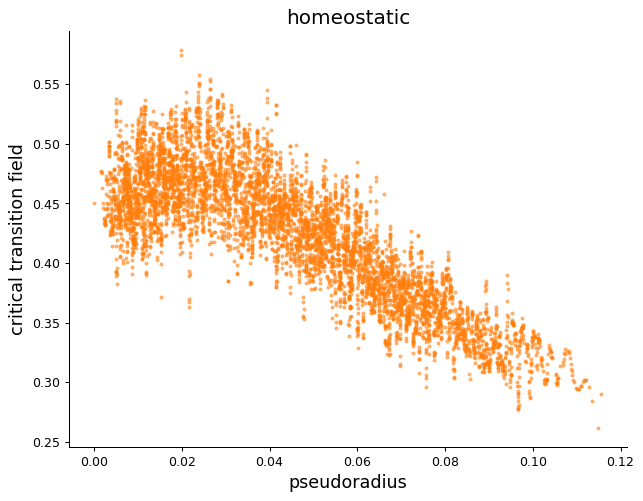

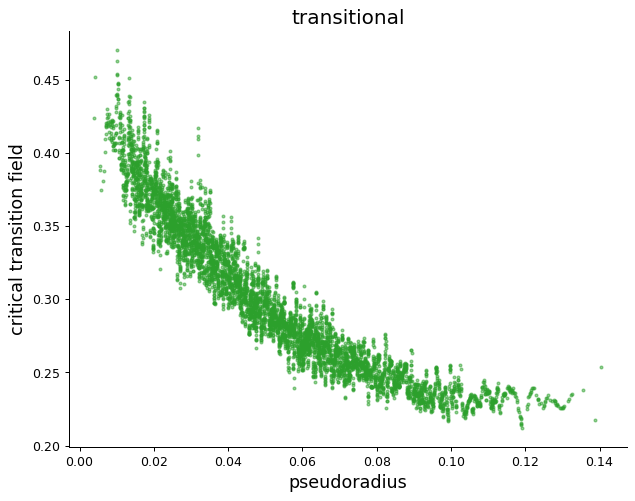

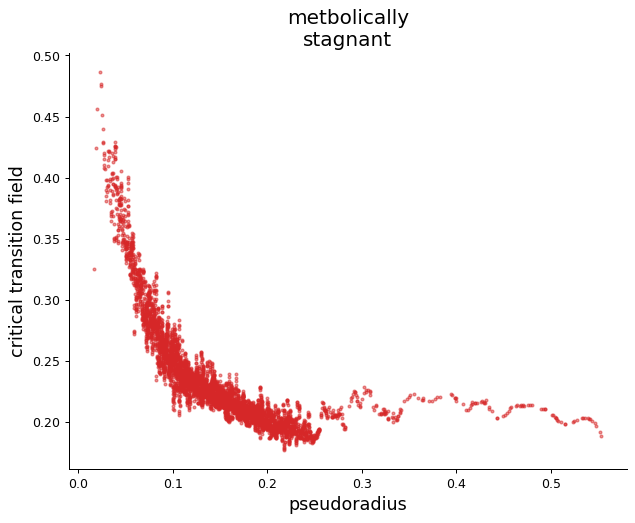

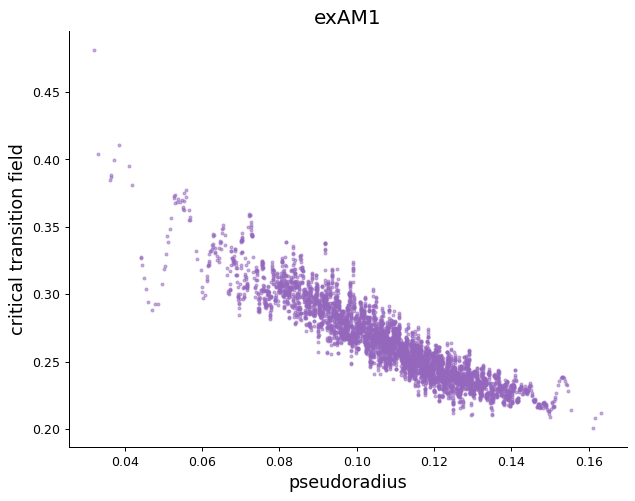

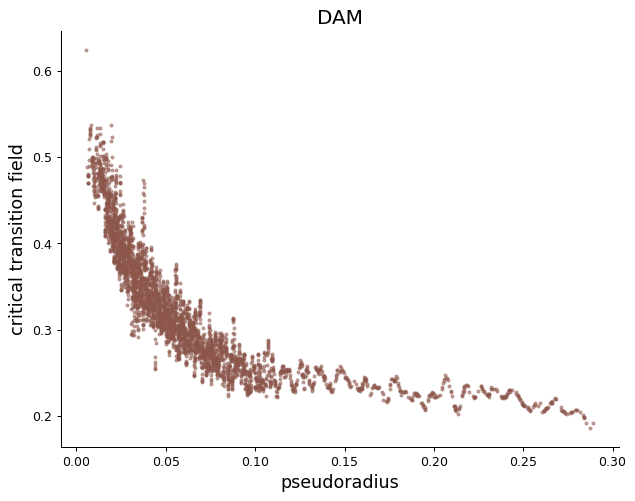

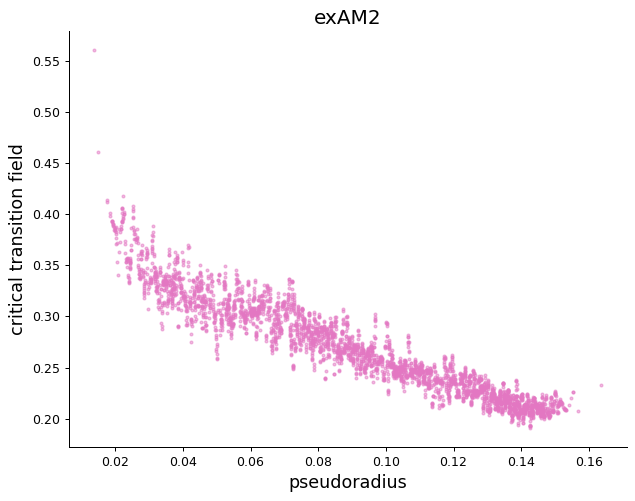

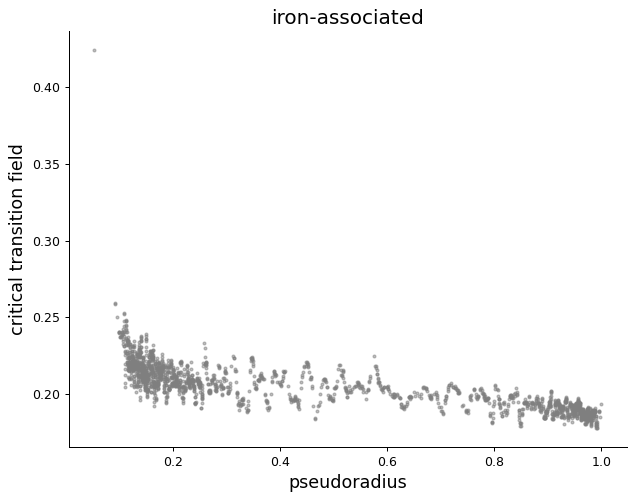

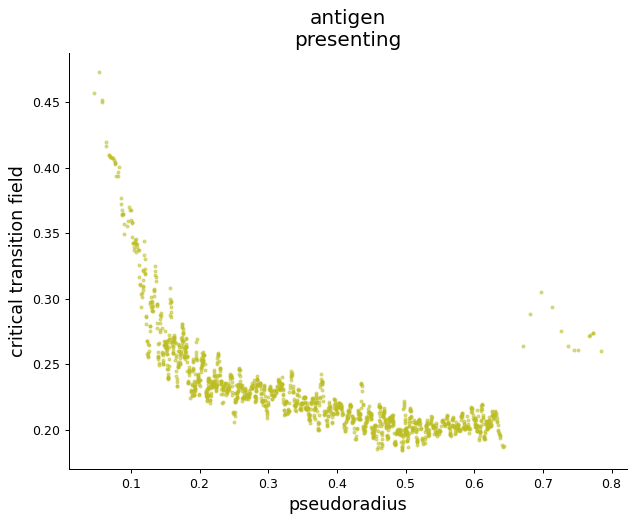

In [11]:
for i in range(9):
    ind = data.obs.query(f'leiden == {i}').index.values
    Z = data[ind,:].obs[['dpt_pseudotime','Ic_sm']].values
    fig = plt.figure(figsize=(8,6), dpi=90)
    ax = plt.axes()
    ax.scatter(Z[:,0], Z[:,1], s=5, alpha = .5, c = f'C{i}')
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    plt.title(clust_names[i], fontsize = 16)
    plt.xlabel('pseudoradius', fontsize=14)
    plt.ylabel('critical transition field', fontsize=14)
    plt.savefig(f'/Users/andrew/Desktop/microgliaFigs/{clust_names[i]}_Ic.png', dpi = 300)
    #plt.xlim(0,)
    plt.show()

In [75]:
clust_map = {}
for i, n in enumerate(clust_names):
    clust_map[i] = n